# **Pengumpulan Data**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import holidays
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
# Menghubungkan Google Drive
drive.mount('/content/drive')

# Path ke file di Google Drive
file_path = '/content/drive/My Drive/Skripsi/Data/Tabel_Harga_Telur.xlsx'

# Membaca file CSV
data_telur = pd.read_excel(file_path)
data_telur

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Komoditas (Rp),01/ 01/ 2019,02/ 01/ 2019,03/ 01/ 2019,04/ 01/ 2019,07/ 01/ 2019,08/ 01/ 2019,09/ 01/ 2019,10/ 01/ 2019,11/ 01/ 2019,...,18/ 12/ 2024,19/ 12/ 2024,20/ 12/ 2024,23/ 12/ 2024,24/ 12/ 2024,25/ 12/ 2024,26/ 12/ 2024,27/ 12/ 2024,30/ 12/ 2024,31/ 12/ 2024
0,Telur Ayam Ras Segar,"26,250","26,050","25,500","25,250","24,950","24,850","24,600","24,350","24,250",...,"30,100","30,300","30,350","30,450","30,550","30,400","30,400","30,550","30,400","30,250"


In [ ]:
data_telur = data_telur.melt(id_vars=["Komoditas (Rp)"], var_name="Tanggal", value_name="Harga_Telur")
data_telur

,Komoditas (Rp),Tanggal,Harga_Telur
0,Telur Ayam Ras Segar,01/ 01/ 2019,"26,250"
1,Telur Ayam Ras Segar,02/ 01/ 2019,"26,050"
2,Telur Ayam Ras Segar,03/ 01/ 2019,"25,500"
3,Telur Ayam Ras Segar,04/ 01/ 2019,"25,250"
4,Telur Ayam Ras Segar,07/ 01/ 2019,"24,950"
...,...,...,...
1561,Telur Ayam Ras Segar,25/ 12/ 2024,"30,400"
1562,Telur Ayam Ras Segar,26/ 12/ 2024,"30,400"
1563,Telur Ayam Ras Segar,27/ 12/ 2024,"30,550"
1564,Telur Ayam Ras Segar,30/ 12/ 2024,"30,400"


In [ ]:
data_telur = data_telur.drop(data_telur.columns[0], axis=1)
data_telur

,Tanggal,Harga_Telur
0,01/ 01/ 2019,"26,250"
1,02/ 01/ 2019,"26,050"
2,03/ 01/ 2019,"25,500"
3,04/ 01/ 2019,"25,250"
4,07/ 01/ 2019,"24,950"
...,...,...
1561,25/ 12/ 2024,"30,400"
1562,26/ 12/ 2024,"30,400"
1563,27/ 12/ 2024,"30,550"
1564,30/ 12/ 2024,"30,400"


In [ ]:
# Mengubah kolom "Tanggal" menjadi tipe data datetime
data_telur["Tanggal"] = pd.to_datetime(data_telur["Tanggal"], errors="coerce", dayfirst=True)
data_telur

,Tanggal,Harga_Telur
0,2019-01-01,"26,250"
1,2019-01-02,"26,050"
2,2019-01-03,"25,500"
3,2019-01-04,"25,250"
4,2019-01-07,"24,950"
...,...,...
1561,2024-12-25,"30,400"
1562,2024-12-26,"30,400"
1563,2024-12-27,"30,550"
1564,2024-12-30,"30,400"


In [ ]:
#output_file = "data_telur.xlsx"
#data_telur.to_excel(output_file, index=False)

In [ ]:
# Path ke file di Google Drive
file_path = '/content/drive/My Drive/Skripsi/Data/Tabel_Harga_DAyam.xlsx'

# Membaca file CSV
data_dayam = pd.read_excel(file_path)
data_dayam

,Komoditas (Rp),01/ 01/ 2019,02/ 01/ 2019,03/ 01/ 2019,04/ 01/ 2019,07/ 01/ 2019,08/ 01/ 2019,09/ 01/ 2019,10/ 01/ 2019,11/ 01/ 2019,...,18/ 12/ 2024,19/ 12/ 2024,20/ 12/ 2024,23/ 12/ 2024,24/ 12/ 2024,25/ 12/ 2024,26/ 12/ 2024,27/ 12/ 2024,30/ 12/ 2024,31/ 12/ 2024
0,Daging Ayam Ras Segar,"40,500","37,850","37,300","36,750","35,300","35,200","34,500","34,100","33,800",...,"34,900","35,200","35,450","35,900","36,150","35,900","35,900","36,350","36,100","35,950"


In [ ]:
data_dayam = data_dayam.melt(id_vars=["Komoditas (Rp)"], var_name="Tanggal", value_name="Harga_Daging_Ayam")
data_dayam

,Komoditas (Rp),Tanggal,Harga_Daging_Ayam
0,Daging Ayam Ras Segar,01/ 01/ 2019,"40,500"
1,Daging Ayam Ras Segar,02/ 01/ 2019,"37,850"
2,Daging Ayam Ras Segar,03/ 01/ 2019,"37,300"
3,Daging Ayam Ras Segar,04/ 01/ 2019,"36,750"
4,Daging Ayam Ras Segar,07/ 01/ 2019,"35,300"
...,...,...,...
1561,Daging Ayam Ras Segar,25/ 12/ 2024,"35,900"
1562,Daging Ayam Ras Segar,26/ 12/ 2024,"35,900"
1563,Daging Ayam Ras Segar,27/ 12/ 2024,"36,350"
1564,Daging Ayam Ras Segar,30/ 12/ 2024,"36,100"


In [ ]:
data_dayam = data_dayam.drop(data_dayam.columns[0], axis=1)
data_dayam

,Tanggal,Harga_Daging_Ayam
0,01/ 01/ 2019,"40,500"
1,02/ 01/ 2019,"37,850"
2,03/ 01/ 2019,"37,300"
3,04/ 01/ 2019,"36,750"
4,07/ 01/ 2019,"35,300"
...,...,...
1561,25/ 12/ 2024,"35,900"
1562,26/ 12/ 2024,"35,900"
1563,27/ 12/ 2024,"36,350"
1564,30/ 12/ 2024,"36,100"


In [ ]:
data_dayam["Tanggal"] = pd.to_datetime(data_dayam["Tanggal"], errors="coerce", dayfirst=True)
data_dayam

,Tanggal,Harga_Daging_Ayam
0,2019-01-01,"40,500"
1,2019-01-02,"37,850"
2,2019-01-03,"37,300"
3,2019-01-04,"36,750"
4,2019-01-07,"35,300"
...,...,...
1561,2024-12-25,"35,900"
1562,2024-12-26,"35,900"
1563,2024-12-27,"36,350"
1564,2024-12-30,"36,100"


In [ ]:
#output_file = "data_daging_ayam.xlsx"
#data_daging.to_excel(output_file, index=False)

In [ ]:
# Path ke file di Google Drive
file_path = '/content/drive/My Drive/Skripsi/Data/Tabel_Harga_DSapi.xlsx'

# Membaca file CSV
data_dsapi = pd.read_excel(file_path)
data_dsapi

,Komoditas (Rp),01/ 01/ 2019,02/ 01/ 2019,03/ 01/ 2019,04/ 01/ 2019,07/ 01/ 2019,08/ 01/ 2019,09/ 01/ 2019,10/ 01/ 2019,11/ 01/ 2019,...,18/ 12/ 2024,19/ 12/ 2024,20/ 12/ 2024,23/ 12/ 2024,24/ 12/ 2024,25/ 12/ 2024,26/ 12/ 2024,27/ 12/ 2024,30/ 12/ 2024,31/ 12/ 2024
0,Daging Sapi,"115,950","113,300","113,100","113,100","113,250","113,150","113,100","113,100","113,100",...,"128,000","128,000","128,000","128,000","128,000","126,900","126,900","128,000","128,050","128,050"


In [ ]:
data_dsapi = data_dsapi.melt(id_vars=["Komoditas (Rp)"], var_name="Tanggal", value_name="Harga_Daging_Sapi")
data_dsapi

,Komoditas (Rp),Tanggal,Harga_Daging_Sapi
0,Daging Sapi,01/ 01/ 2019,"115,950"
1,Daging Sapi,02/ 01/ 2019,"113,300"
2,Daging Sapi,03/ 01/ 2019,"113,100"
3,Daging Sapi,04/ 01/ 2019,"113,100"
4,Daging Sapi,07/ 01/ 2019,"113,250"
...,...,...,...
1561,Daging Sapi,25/ 12/ 2024,"126,900"
1562,Daging Sapi,26/ 12/ 2024,"126,900"
1563,Daging Sapi,27/ 12/ 2024,"128,000"
1564,Daging Sapi,30/ 12/ 2024,"128,050"


In [ ]:
data_dsapi = data_dsapi.drop(data_dsapi.columns[0], axis=1)
data_dsapi

,Tanggal,Harga_Daging_Sapi
0,01/ 01/ 2019,"115,950"
1,02/ 01/ 2019,"113,300"
2,03/ 01/ 2019,"113,100"
3,04/ 01/ 2019,"113,100"
4,07/ 01/ 2019,"113,250"
...,...,...
1561,25/ 12/ 2024,"126,900"
1562,26/ 12/ 2024,"126,900"
1563,27/ 12/ 2024,"128,000"
1564,30/ 12/ 2024,"128,050"


In [ ]:
data_dsapi["Tanggal"] = pd.to_datetime(data_dsapi["Tanggal"], errors="coerce", dayfirst=True)
data_dsapi

,Tanggal,Harga_Daging_Sapi
0,2019-01-01,"115,950"
1,2019-01-02,"113,300"
2,2019-01-03,"113,100"
3,2019-01-04,"113,100"
4,2019-01-07,"113,250"
...,...,...
1561,2024-12-25,"126,900"
1562,2024-12-26,"126,900"
1563,2024-12-27,"128,000"
1564,2024-12-30,"128,050"


In [ ]:
import holidays
import pandas as pd

# Inisialisasi hari libur nasional di Indonesia
indonesia_holidays = holidays.Indonesia()

# Membuat rentang tanggal dari 1 Januari 2019 hingga 1 Januari 2025
date_range = pd.date_range(start="2019-01-01", end="2024-12-31", freq="D")

# Membuat DataFrame dari rentang tanggal
data_holidays = pd.DataFrame({"Tanggal": date_range})

# Menambahkan kolom 'is_holiday' untuk memeriksa apakah tanggal termasuk hari libur
data_holidays["is_holiday"] = data_holidays["Tanggal"].apply(lambda x: x in indonesia_holidays)

# Menambahkan kolom 'holiday_name' untuk menampilkan nama hari libur (jika ada)
data_holidays["holiday_name"] = data_holidays["Tanggal"].apply(lambda x: indonesia_holidays.get(x) if x in indonesia_holidays else None)
data_holidays

,Tanggal,is_holiday,holiday_name
0,2019-01-01,True,New Year's Day
1,2019-01-02,False,None
2,2019-01-03,False,None
3,2019-01-04,False,None
4,2019-01-05,False,None
...,...,...,...
2187,2024-12-27,False,None
2188,2024-12-28,False,None
2189,2024-12-29,False,None
2190,2024-12-30,False,None


In [ ]:
# Tandai H-7 sebelum hari libur sebagai true
for libur in data_holidays.loc[data_holidays['is_holiday'], 'Tanggal']:
    h_min_7_range = pd.date_range(end=libur - pd.Timedelta(days=1), periods=7)
    data_holidays.loc[data_holidays['Tanggal'].isin(h_min_7_range), 'is_holiday'] = True
data_holidays

,Tanggal,is_holiday,holiday_name
0,2019-01-01,True,New Year's Day
1,2019-01-02,False,None
2,2019-01-03,False,None
3,2019-01-04,False,None
4,2019-01-05,False,None
...,...,...,...
2187,2024-12-27,False,None
2188,2024-12-28,False,None
2189,2024-12-29,False,None
2190,2024-12-30,False,None


In [ ]:
data_holidays.drop('holiday_name', axis=1, inplace=True)
data_holidays

,Tanggal,is_holiday
0,2019-01-01,True
1,2019-01-02,False
2,2019-01-03,False
3,2019-01-04,False
4,2019-01-05,False
...,...,...
2187,2024-12-27,False
2188,2024-12-28,False
2189,2024-12-29,False
2190,2024-12-30,False


# **Penggabungan Data**

In [ ]:
df = pd.merge(data_dayam, data_telur, on='Tanggal', how='outer')
df

,Tanggal,Harga_Daging_Ayam,Harga_Telur
0,2019-01-01,"40,500","26,250"
1,2019-01-02,"37,850","26,050"
2,2019-01-03,"37,300","25,500"
3,2019-01-04,"36,750","25,250"
4,2019-01-07,"35,300","24,950"
...,...,...,...
1561,2024-12-25,"35,900","30,400"
1562,2024-12-26,"35,900","30,400"
1563,2024-12-27,"36,350","30,550"
1564,2024-12-30,"36,100","30,400"


In [ ]:
df1 = pd.merge(data_dsapi, data_holidays, on='Tanggal', how='outer')
df1

,Tanggal,Harga_Daging_Sapi,is_holiday
0,2019-01-01,"115,950",True
1,2019-01-02,"113,300",False
2,2019-01-03,"113,100",False
3,2019-01-04,"113,100",False
4,2019-01-05,NaN,False
...,...,...,...
2187,2024-12-27,"128,000",False
2188,2024-12-28,NaN,False
2189,2024-12-29,NaN,False
2190,2024-12-30,"128,050",False


In [ ]:
df = pd.merge(df, df1, on='Tanggal', how='left')
df

,Tanggal,Harga_Daging_Ayam,Harga_Telur,Harga_Daging_Sapi,is_holiday
0,2019-01-01,"40,500","26,250","115,950",True
1,2019-01-02,"37,850","26,050","113,300",False
2,2019-01-03,"37,300","25,500","113,100",False
3,2019-01-04,"36,750","25,250","113,100",False
4,2019-01-07,"35,300","24,950","113,250",False
...,...,...,...,...,...
1561,2024-12-25,"35,900","30,400","126,900",True
1562,2024-12-26,"35,900","30,400","126,900",False
1563,2024-12-27,"36,350","30,550","128,000",False
1564,2024-12-30,"36,100","30,400","128,050",False


# **Prepocessing Data**

In [ ]:
# Membersihkan kolom "Harga Telur"
df["Harga_Telur"] = df["Harga_Telur"].replace("-", None)  # Mengganti "-" dengan None
df["Harga_Telur"] = df["Harga_Telur"].str.replace(",", "", regex=True).astype(float)  # Konversi ke float

In [ ]:
# Membersihkan kolom "Harga Daging Ayam"
df["Harga_Daging_Ayam"] = df["Harga_Daging_Ayam"].replace("-", None)  # Mengganti "-" dengan None
df["Harga_Daging_Ayam"] = df["Harga_Daging_Ayam"].str.replace(",", "", regex=True).astype(float)  # Konversi ke float

In [ ]:
# Membersihkan kolom "Harga Daging Sapi"
df["Harga_Daging_Sapi"] = df["Harga_Daging_Sapi"].replace("-", None)  # Mengganti "-" dengan None
df["Harga_Daging_Sapi"] = df["Harga_Daging_Sapi"].str.replace(",", "", regex=True).astype(float)  # Konversi ke float

In [ ]:
#Encoding
df.rename(columns={'is_holiday': 'Pekan_Sebelum_Libur'}, inplace=True)
df['Pekan_Sebelum_Libur'] = df['Pekan_Sebelum_Libur'].astype(int)
df

,Tanggal,Harga_Daging_Ayam,Harga_Telur,Harga_Daging_Sapi,Pekan_Sebelum_Libur
0,2019-01-01,40500.0,26250.0,115950.0,1
1,2019-01-02,37850.0,26050.0,113300.0,0
2,2019-01-03,37300.0,25500.0,113100.0,0
3,2019-01-04,36750.0,25250.0,113100.0,0
4,2019-01-07,35300.0,24950.0,113250.0,0
...,...,...,...,...,...
1561,2024-12-25,35900.0,30400.0,126900.0,1
1562,2024-12-26,35900.0,30400.0,126900.0,0
1563,2024-12-27,36350.0,30550.0,128000.0,0
1564,2024-12-30,36100.0,30400.0,128050.0,0


In [ ]:
# Set kolom 'Tanggal' sebagai index
df.set_index('Tanggal', inplace=True)
df

,Harga_Daging_Ayam,Harga_Telur,Harga_Daging_Sapi,Pekan_Sebelum_Libur
Tanggal,,,,
2019-01-01,40500.0,26250.0,115950.0,1
2019-01-02,37850.0,26050.0,113300.0,0
2019-01-03,37300.0,25500.0,113100.0,0
2019-01-04,36750.0,25250.0,113100.0,0
2019-01-07,35300.0,24950.0,113250.0,0
...,...,...,...,...
2024-12-25,35900.0,30400.0,126900.0,1
2024-12-26,35900.0,30400.0,126900.0,0
2024-12-27,36350.0,30550.0,128000.0,0


In [ ]:
#output_file = "data_mentah.xlsx"
#df.to_excel(output_file, index=False)

<Axes: xlabel='Tanggal'>

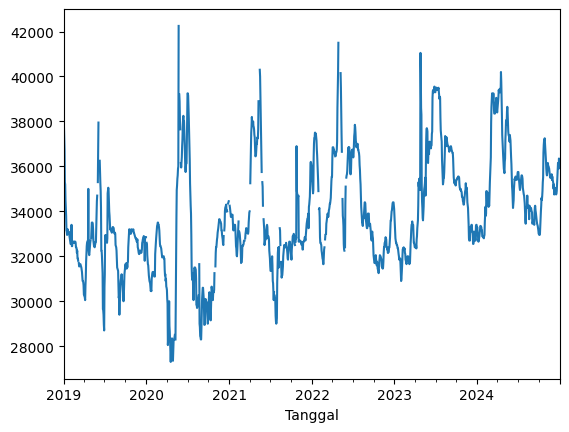

In [ ]:
df['Harga_Daging_Ayam'].plot()

# **Splitting Data**

In [ ]:
# data test
train = df[:-10]
test = df[-10:]

# **Penanganan Data**

In [ ]:
train.dtypes

,0
Harga_Daging_Ayam,float64
Harga_Telur,float64
Harga_Daging_Sapi,float64
Pekan_Sebelum_Libur,int64


In [ ]:
test.dtypes

,0
Harga_Daging_Ayam,float64
Harga_Telur,float64
Harga_Daging_Sapi,float64
Pekan_Sebelum_Libur,int64


In [ ]:
train.isnull().sum()

,0
Harga_Daging_Ayam,48
Harga_Telur,48
Harga_Daging_Sapi,48
Pekan_Sebelum_Libur,0


In [ ]:
test.isnull().sum()

,0
Harga_Daging_Ayam,0
Harga_Telur,0
Harga_Daging_Sapi,0
Pekan_Sebelum_Libur,0


In [ ]:
# Interpolasi Berdasarkan Waktu
train['Harga_Telur'] = train['Harga_Telur'].interpolate(method='time')
train['Harga_Daging_Ayam'] = train['Harga_Daging_Ayam'].interpolate(method='time')
train['Harga_Daging_Sapi'] = train['Harga_Daging_Sapi'].interpolate(method='time')
train.isnull().sum()

<ipython-input-34-8f2b3b745d18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Harga_Telur'] = train['Harga_Telur'].interpolate(method='time')
<ipython-input-34-8f2b3b745d18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Harga_Daging_Ayam'] = train['Harga_Daging_Ayam'].interpolate(method='time')
<ipython-input-34-8f2b3b745d18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,0
Harga_Daging_Ayam,0
Harga_Telur,0
Harga_Daging_Sapi,0
Pekan_Sebelum_Libur,0


In [ ]:
import numpy as np
for col in train.columns:
    if isinstance(train[col][0], float):
        Q1 = np.percentile(train[col], 25)
        Q3 = np.percentile(train[col], 75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - (1.5 * IQR)
        batas_atas = Q3 + (1.5 * IQR)
        jumlah_outlier = train[(train[col] < batas_bawah) | (train[col] > batas_atas)].shape[0]
        # Filter baris yang merupakan outlier
        outliers = train[(train[col] < batas_bawah) | (train[col] > batas_atas)]
        print('Jumlah data outlier', col, "adalah :", jumlah_outlier)

Jumlah data outlier Harga_Daging_Ayam adalah : 14
Jumlah data outlier Harga_Telur adalah : 0
Jumlah data outlier Harga_Daging_Sapi adalah : 0


<ipython-input-35-921a7423a215>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(train[col][0], float):


In [ ]:
import numpy as np
for col in test.columns:
    if isinstance(test[col][0], float):
        Q1 = np.percentile(test[col], 25)
        Q3 = np.percentile(test[col], 75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - (1.5 * IQR)
        batas_atas = Q3 + (1.5 * IQR)
        jumlah_outlier = test[(test[col] < batas_bawah) | (test[col] > batas_atas)].shape[0]
        # Filter baris yang merupakan outlier
        outliers = test[(test[col] < batas_bawah) | (test[col] > batas_atas)]
        print('Jumlah data outlier', col, "adalah :", jumlah_outlier)

Jumlah data outlier Harga_Daging_Ayam adalah : 0
Jumlah data outlier Harga_Telur adalah : 1
Jumlah data outlier Harga_Daging_Sapi adalah : 4


<ipython-input-36-59b7d71d06d6>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(test[col][0], float):


<Axes: xlabel='Tanggal'>

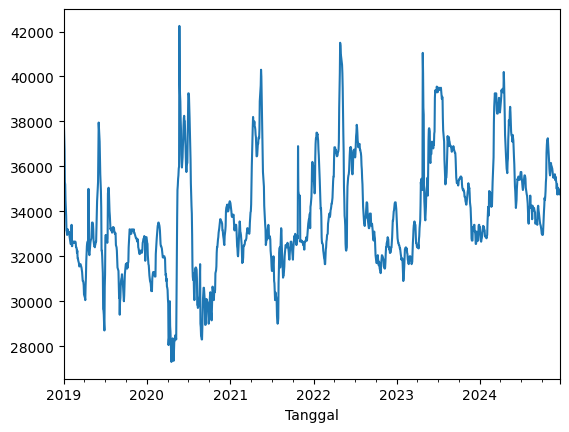

In [ ]:
train['Harga_Daging_Ayam'].plot()

<Axes: xlabel='Tanggal'>

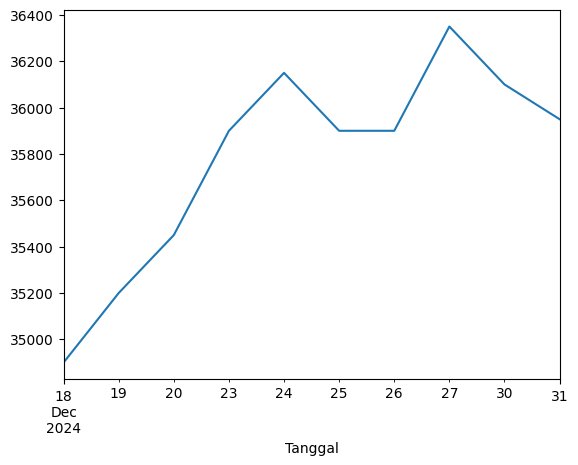

In [ ]:
test['Harga_Daging_Ayam'].plot()

# **Stasioner**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(harga):
    result=adfuller(harga)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(train['Harga_Daging_Ayam'])

ADF Test Statistic : -5.449208705967024
p-value : 2.667742292987797e-06
#Lags Used : 3
Number of Observations Used : 1552
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# **Plot ACF dan PACF**

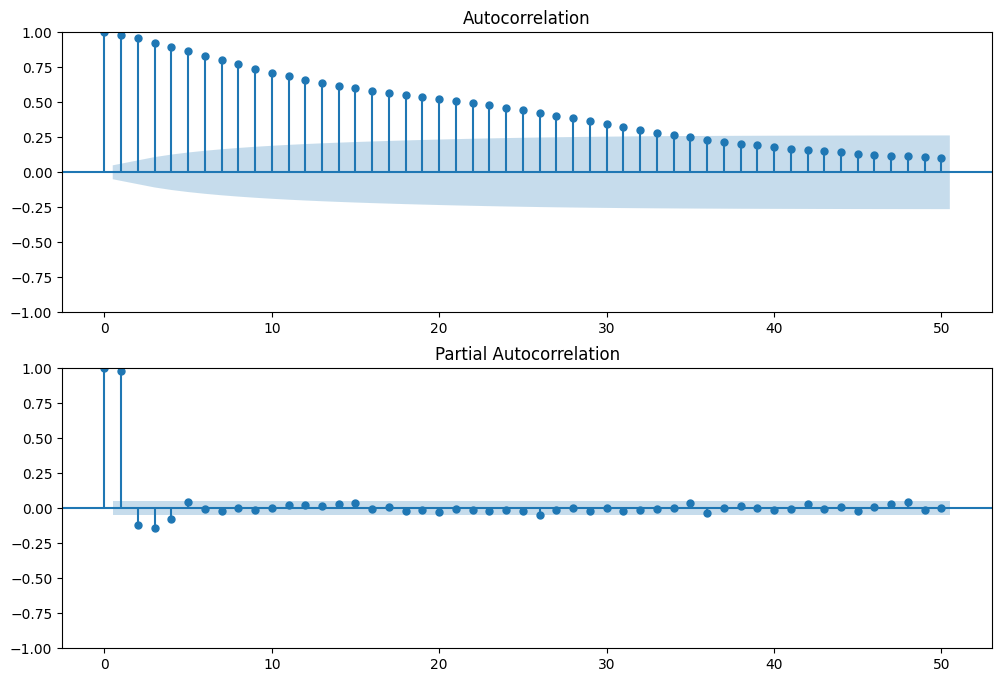

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['Harga_Daging_Ayam'].dropna(),lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['Harga_Daging_Ayam'].dropna(),lags=50,ax=ax2)

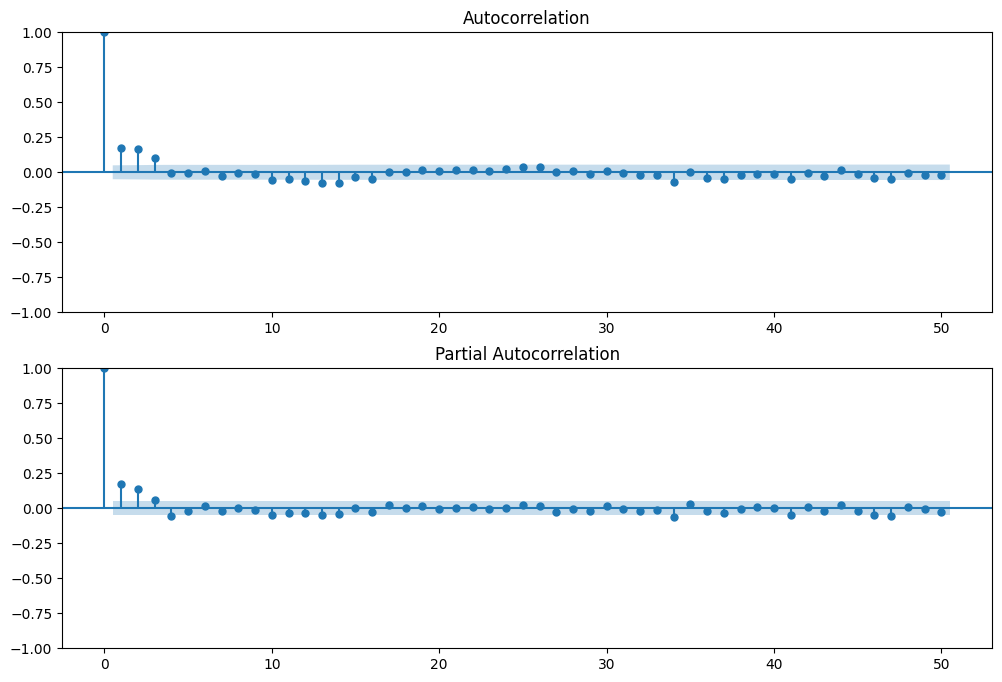

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['Harga_Daging_Ayam'].diff().dropna(),lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['Harga_Daging_Ayam'].diff().dropna(),lags=50,ax=ax2)

# **Pembagian Variabel**

In [ ]:
# Pisahkan target (Y) dan variabel eksternal (X)
y_train = train['Harga_Daging_Ayam']
y_test = test['Harga_Daging_Ayam']
x_train = train[['Harga_Telur', 'Harga_Daging_Sapi', 'Pekan_Sebelum_Libur']]
x_test = test[['Harga_Telur', 'Harga_Daging_Sapi', 'Pekan_Sebelum_Libur']]

In [ ]:
x_test

,Harga_Telur,Harga_Daging_Sapi,Pekan_Sebelum_Libur
Tanggal,,,
2024-12-18,30100.0,128000.0,1
2024-12-19,30300.0,128000.0,1
2024-12-20,30350.0,128000.0,1
2024-12-23,30450.0,128000.0,1
2024-12-24,30550.0,128000.0,1
2024-12-25,30400.0,126900.0,1
2024-12-26,30400.0,126900.0,0
2024-12-27,30550.0,128000.0,0
2024-12-30,30400.0,128050.0,0


In [ ]:
y_train

,Harga_Daging_Ayam
Tanggal,
2019-01-01,40500.0
2019-01-02,37850.0
2019-01-03,37300.0
2019-01-04,36750.0
2019-01-07,35300.0
...,...
2024-12-11,34800.0
2024-12-12,35000.0
2024-12-13,34950.0


# **Membangun Model ARIMAX**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(endog=y_train,exog=x_train,order=[0,0,3])
results260=model.fit()
results260.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Harga_Daging_Ayam   No. Observations:                 1556
Model:               SARIMAX(0, 0, 3)   Log Likelihood              -12390.687
Date:                Mon, 26 May 2025   AIC                          24795.374
Time:                        15:15:51   BIC                          24832.823
Sample:                    01-01-2019   HQIC                         24809.299
                         - 12-17-2024                                         
Covariance Type:                  opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Harga_Telur             0.1395      0.023      6.074      0.000       0.094       0.184
Harga_Daging_Sapi       0.2487      0.005     52.669      0.000       0.239       0.258
Pekan_Sebelum_Libur   490.4744     45.292     10.829      0.000     401.704     579.245
ma.L1                   1.3760      0.012    111.525      0.000       1.352       1.400
ma.L2                   1.2143      0.019     64.398      0.000       1.177       1.251
ma.L3                   0.6255      0.015     42.080      0.000       0.596       0.655
sigma2               4.894e+05   1.06e+04     46.384      0.000    4.69e+05     5.1e+05
===================================================================================
Ljung-Box (L1) (Q):                 167.74   Jarque-Bera (JB):              2719.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **Menguji Model**

In [ ]:
forecast_result = results260.forecast(steps=len(y_test), exog=x_test)
forecast_result

,predicted_mean
2024-12-18,35730.636041
2024-12-19,36180.137550
2024-12-20,36576.094287
2024-12-23,36569.194522
2024-12-24,36583.142322
2024-12-25,36288.667681
2024-12-26,35798.193233
2024-12-27,36092.667874
2024-12-30,36084.180399
2024-12-31,36063.258699


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_result)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 1.38%


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Hitung MAE dan RMSE
mae = mean_absolute_error(y_test, forecast_result)
rmse = np.sqrt(mean_squared_error(y_test, forecast_result))

# Tampilkan hasil
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 491.61
Root Mean Squared Error (RMSE): 616.03


In [ ]:
# Prediksi pada data train
train_predictions = results260.fittedvalues  # Prediksi ARIMAX pada train
train_predictions

,0
Tanggal,
2019-01-01,32986.738796
2019-01-02,37818.542889
2019-01-03,34998.093630
2019-01-04,35746.689330
2019-01-07,35527.035690
...,...
2024-12-11,34796.305791
2024-12-12,35395.246151
2024-12-13,35017.765117


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_train, train_predictions)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 1.49%


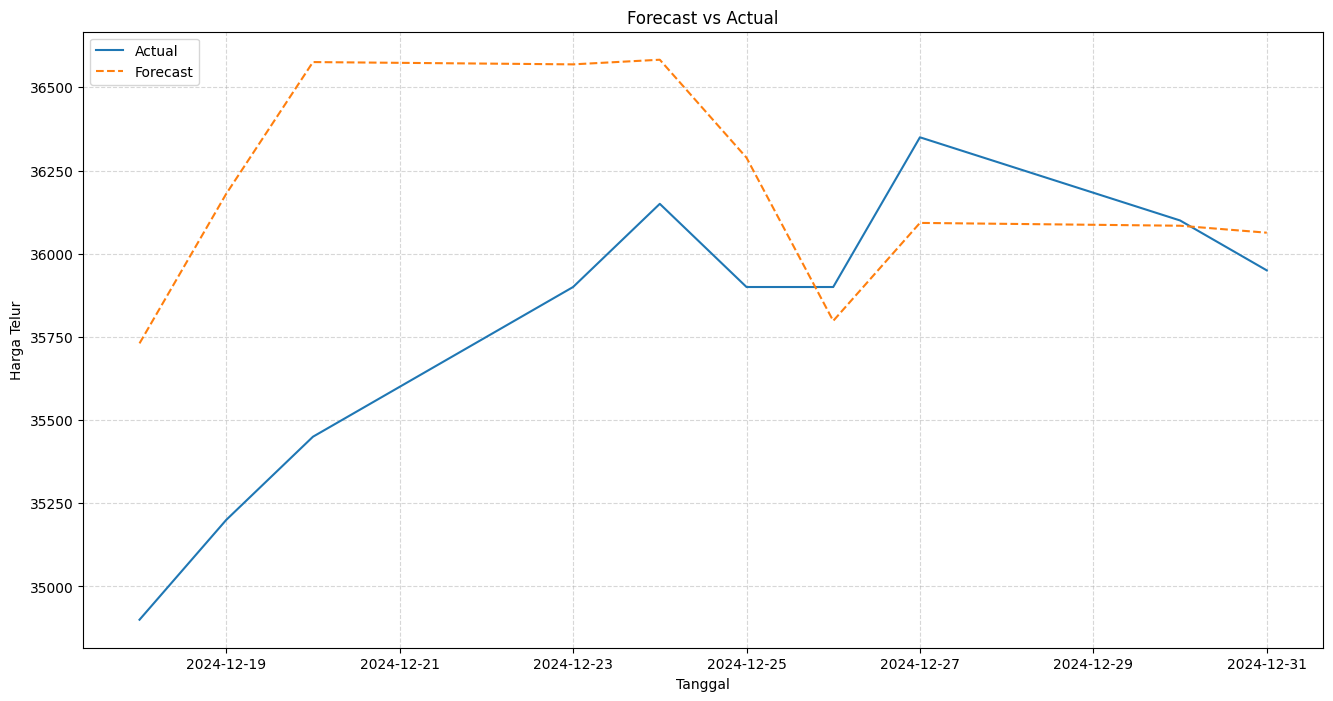

In [ ]:
import matplotlib.pyplot as plt

# Pastikan panjang forecast_result dan y_test sesuai
plt.figure(figsize=(16, 8))

# Plot data aktual (y_test)
plt.plot(y_test.index, y_test, label='Actual')

# Plot hasil prediksi (forecast_result)
plt.plot(y_test.index, forecast_result, label='Forecast', linestyle='--')

# Tambahan estetika plot
plt.title("Forecast vs Actual")
plt.xlabel("Tanggal")
plt.ylabel("Harga Telur")
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# **Menghitung Residual**

In [ ]:
# Hitung Residual di Data Train
residuals_train = pd.DataFrame(results260.resid, columns=['Residual'])

# Prediksi di Data Test dan Hitung Residual
predictions_test = results260.forecast(steps=len(y_test), exog=x_test)
residuals_test = pd.DataFrame(y_test - predictions_test, columns=['Residual'])

# Gabungkan Residual Train + Test (Vertikal)
residuals_combined = pd.concat([residuals_train, residuals_test], axis=0).reset_index(drop=True)
residuals_combined

,Residual
0,7513.261204
1,31.457111
2,2301.906370
3,1003.310670
4,-227.035690
...,...
1561,-388.667681
1562,101.806767
1563,257.332126
1564,15.819601


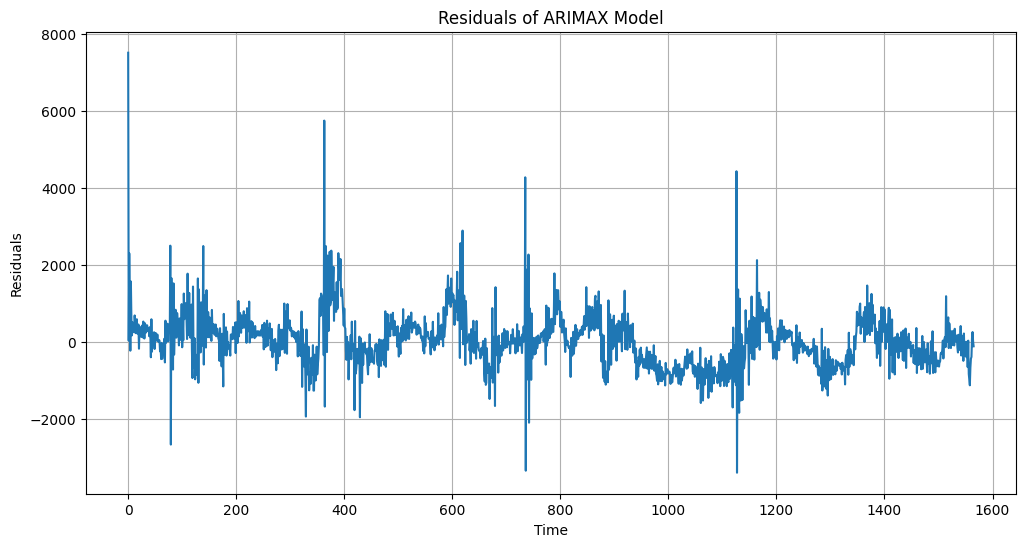

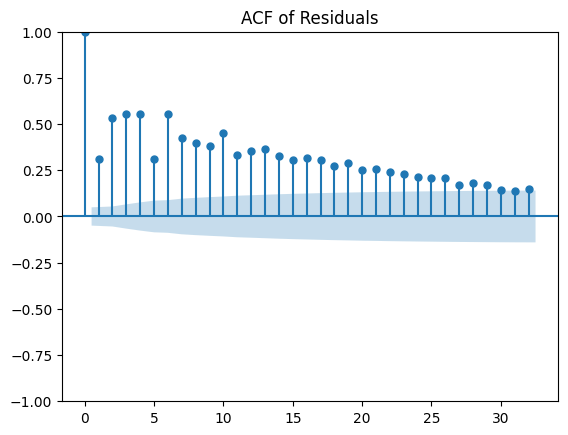

ADF Statistic: -4.944700570932467
p-value: 2.8521212349108936e-05


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(residuals_combined)
plt.title('Residuals of ARIMAX Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid()
plt.show()
# ACF of residuals
plot_acf(residuals_combined)
plt.title('ACF of Residuals')
plt.show()
# Perform the ADF test on residuals
result_residuals = adfuller(residuals_combined)
print('ADF Statistic:', result_residuals[0])
print('p-value:', result_residuals[1])

Data residual bersifat stasioner

# **Prepocessing Data Residual**

In [ ]:
residuals = residuals_combined.values.reshape(-1, 1)
residuals

array([[7513.2612038 ],
       [  31.45711133],
       [2301.9063699 ],
       ...,
       [ 257.3321259 ],
       [  15.81960101],
       [-113.25869927]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
residuals = scaler.fit_transform(residuals)
residuals

array([[1.        ],
       [0.31424796],
       [0.5223482 ],
       ...,
       [0.33495076],
       [0.31281469],
       [0.3009839 ]])

# **Splitting Data**

In [ ]:
# Tentukan panjang data test
test_size = 15 # misalnya, untuk prediksi 7 hari

# Bagi dataset menjadi train dan test
train = residuals[:-test_size]
test = residuals[-test_size:]

# Fungsi untuk membuat sequence LSTM
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(seq_length, len(data)):
        sequences.append(data[i-seq_length:i, 0])
        labels.append(data[i, 0])
    return np.array(sequences), np.array(labels)

# Panjang sequence
seq_length = 5

# Buat sequence untuk train dan test
X_train, Y_train = create_sequences(train, seq_length)
X_test, Y_test = create_sequences(test, seq_length)

# Sesuaikan dimensi untuk LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Ukuran Data:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Ukuran Data:
Train: (1546, 5, 1), Test: (10, 5, 1)


# **LSTM 3 Layer**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0514 - val_loss: 0.0040
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0029 - val_loss: 0.0026


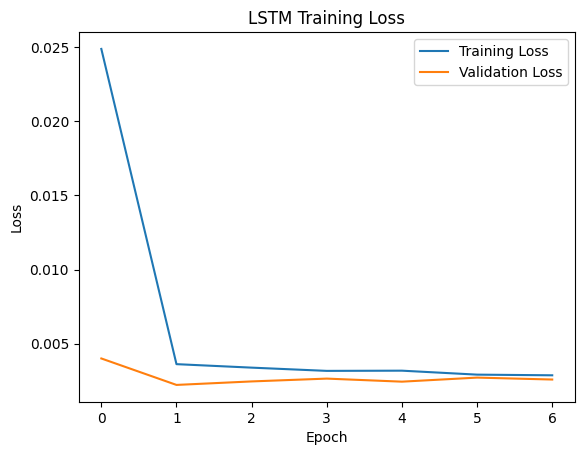

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
# Define the LSTM model3
model3 = Sequential()
model3.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model3.add(Dropout(0.2))
model3.add(LSTM(64, return_sequences=True))
model3.add(Dropout(0.1))
model3.add(LSTM(32, return_sequences=False))
model3.add(Dropout(0.1))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(1))

# Compile the model3
model3.compile(optimizer='adam', loss='mean_squared_error')
#Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model3
history = model3.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), callbacks=[early_stop],)
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

sgd lebih baru rmspros
sgd punya algorimat yg berbeda
adam perkembangan dari RMSprop

In [ ]:
model3.save("best_LSTM_Daging103.h5")

In [ ]:
#from tensorflow.keras.models import load_model
#model3 = load_model('best_LSTM_Daging.h5')
#model3.summary()

# **Recursive data**

In [ ]:
y_pred = []
input_seq = X_test[0]  # satu window awal

for i in range(len(X_test)):
    pred = model3.predict(input_seq.reshape(1, seq_length, 1))
    y_pred.append(pred[0][0])

    # Tambahkan prediksi ke input dan geser window
    input_seq = np.append(input_seq[1:], pred[0][0])

y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[np.float32(0.29311588),
 np.float32(0.28979722),
 np.float32(0.2917792),
 np.float32(0.28951442),
 np.float32(0.29541185),
 np.float32(0.29243347),
 np.float32(0.29222825),
 np.float32(0.29254562),
 np.float32(0.29263297),
 np.float32(0.29310417)]

In [ ]:
df_pred = pd.DataFrame(y_pred, columns=['Prediction'])

In [ ]:
# Invers transform untuk balik ke skala asli
y_pred_rescaled = scaler.inverse_transform(df_pred)
df_pred_final=pd.DataFrame(y_pred_rescaled, columns=['pred_residual'])
df_pred_final

,pred_residual
0,-199.101578
1,-235.309448
2,-213.685394
3,-238.394836
4,-174.051697
5,-206.546951
6,-208.785965
7,-205.323395
8,-204.370377
9,-199.229355


In [ ]:
y_test_rescaled = scaler.inverse_transform(Y_test.reshape(-1, 1))
df_test_final=pd.DataFrame(y_test_rescaled, columns=['test_residual'])
df_test_final

,test_residual
0,-830.636041
1,-980.137550
2,-1126.094287
3,-669.194522
4,-433.142322
5,-388.667681
6,101.806767
7,257.332126
8,15.819601
9,-113.258699


Mean Absolute Percentage Error: 2.356753760582247


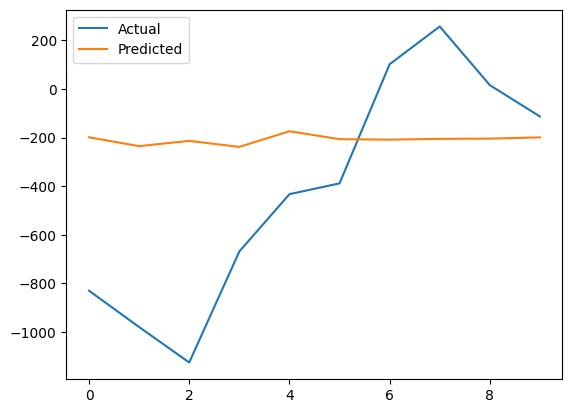

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape_LSTM= mean_absolute_percentage_error(df_test_final, df_pred_final)
print("Mean Absolute Percentage Error:", mape_LSTM)
# Plot data actual vs. prediksi
plt.plot(df_test_final, label='Actual')
plt.plot(df_pred_final, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# Combine ARIMAX and LSTM predictions
hybrid_predictions = forecast_result + df_pred_final.values.flatten()
hybrid_predictions

,predicted_mean
2024-12-18,35531.534464
2024-12-19,35944.828102
2024-12-20,36362.408893
2024-12-23,36330.799686
2024-12-24,36409.090625
2024-12-25,36082.120729
2024-12-26,35589.407268
2024-12-27,35887.344479
2024-12-30,35879.810022
2024-12-31,35864.029344


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, hybrid_predictions)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 1.19%


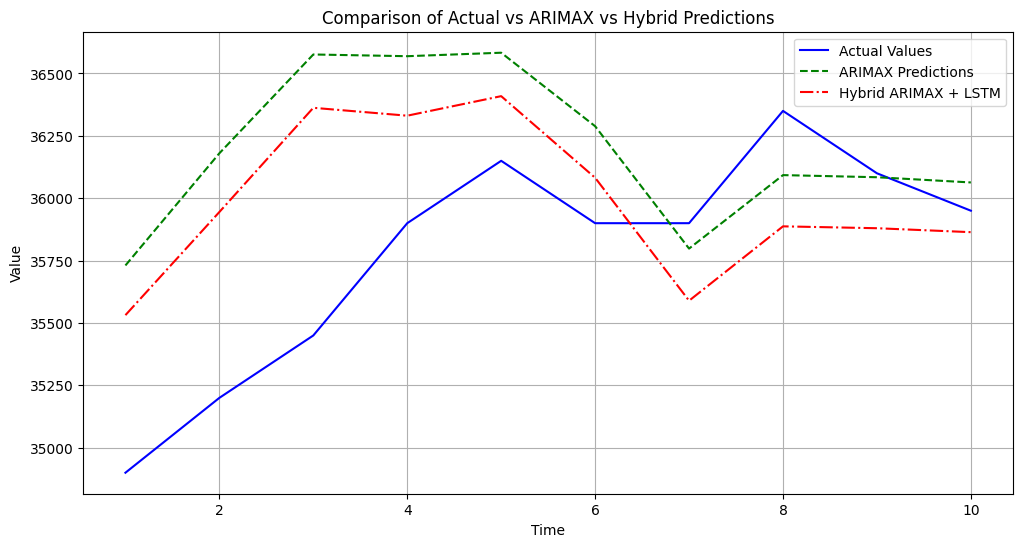

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Contoh data (gantilah dengan data asli)
x = np.arange(1, len(y_test) + 1)  # Sumbu X berdasarkan jumlah data
y1 = y_test  # Data asli
y2 = forecast_result  # Hasil prediksi ARIMAX
y3 = hybrid_predictions  # Hasil prediksi hybrid ARIMAX + LSTM

# Visualisasi
plt.figure(figsize=(12, 6))

plt.plot(x, y1, label="Actual Values", color="blue", linestyle="-")  # Garis asli
plt.plot(x, y2, label="ARIMAX Predictions", color="green", linestyle="--")  # Prediksi ARIMAX
plt.plot(x, y3, label="Hybrid ARIMAX + LSTM", color="red", linestyle="-.")  # Prediksi Hybrid

# Tambahkan judul dan label
plt.title("Comparison of Actual vs ARIMAX vs Hybrid Predictions")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

# **Prediksi Bulan Januari**

In [ ]:
df1 = pd.read_excel("data_jan2025_art.xlsx")
df1

,Tanggal,Harga_Telur,Harga_Daging_Sapi,Pekan_Sebelum_Libur
0,2025-01-01,30100,127400,1
1,2025-01-02,30100,128050,0
2,2025-01-03,29950,128150,0
3,2025-01-06,29950,128150,0
4,2025-01-07,29000,128200,0
5,2025-01-08,28800,128100,0
6,2025-01-09,28600,128200,0
7,2025-01-10,28400,128200,0
8,2025-01-13,27550,128250,0
9,2025-01-14,27350,128250,0


In [ ]:
df1.set_index('Tanggal', inplace=True)
df1

,Harga_Telur,Harga_Daging_Sapi,Pekan_Sebelum_Libur
Tanggal,,,
2025-01-01,30100,127400,1
2025-01-02,30100,128050,0
2025-01-03,29950,128150,0
2025-01-06,29950,128150,0
2025-01-07,29000,128200,0
2025-01-08,28800,128100,0
2025-01-09,28600,128200,0
2025-01-10,28400,128200,0
2025-01-13,27550,128250,0


In [ ]:
from statsmodels.tsa.arima.model import ARIMAResults
modelx = ARIMAResults.load('best_ARIMAX_art1.pkl')
modelx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Harga_Daging_Ayam   No. Observations:                 1556
Model:               SARIMAX(0, 0, 3)   Log Likelihood              -12390.687
Date:                Mon, 26 May 2025   AIC                          24795.374
Time:                        15:49:02   BIC                          24832.823
Sample:                    01-01-2019   HQIC                         24809.299
                         - 12-17-2024                                         
Covariance Type:                  opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Harga_Telur             0.1395      0.023      6.074      0.000       0.094       0.184
Harga_Daging_Sapi       0.2487      0.005     52.669      0.000       0.239       0.258
Pekan_Sebelum_Libur   490.4744     45.292     10.829      0.000     401.704     579.245
ma.L1                   1.3760      0.012    111.525      0.000       1.352       1.400
ma.L2                   1.2143      0.019     64.398      0.000       1.177       1.251
ma.L3                   0.6255      0.015     42.080      0.000       0.596       0.655
sigma2               4.894e+05   1.06e+04     46.384      0.000    4.69e+05     5.1e+05
===================================================================================
Ljung-Box (L1) (Q):                 167.74   Jarque-Bera (JB):              2719.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# --- Forecast 1 bulan ke depan dengan ARIMAX ---
exog_forecast = df1[['Harga_Telur', 'Harga_Daging_Sapi', 'Pekan_Sebelum_Libur']]
arimax_pred = modelx.forecast(steps=23, exog=exog_forecast)

In [ ]:
arimax_pred

,predicted_mean
2024-12-18,35581.425346
2024-12-19,35674.201727
2024-12-20,36067.131313
2024-12-23,36046.283749
2024-12-24,35926.213875
2024-12-25,35873.449827
2024-12-26,35870.422676
2024-12-27,35842.527077
2024-12-30,35736.405003
2024-12-31,35708.509403


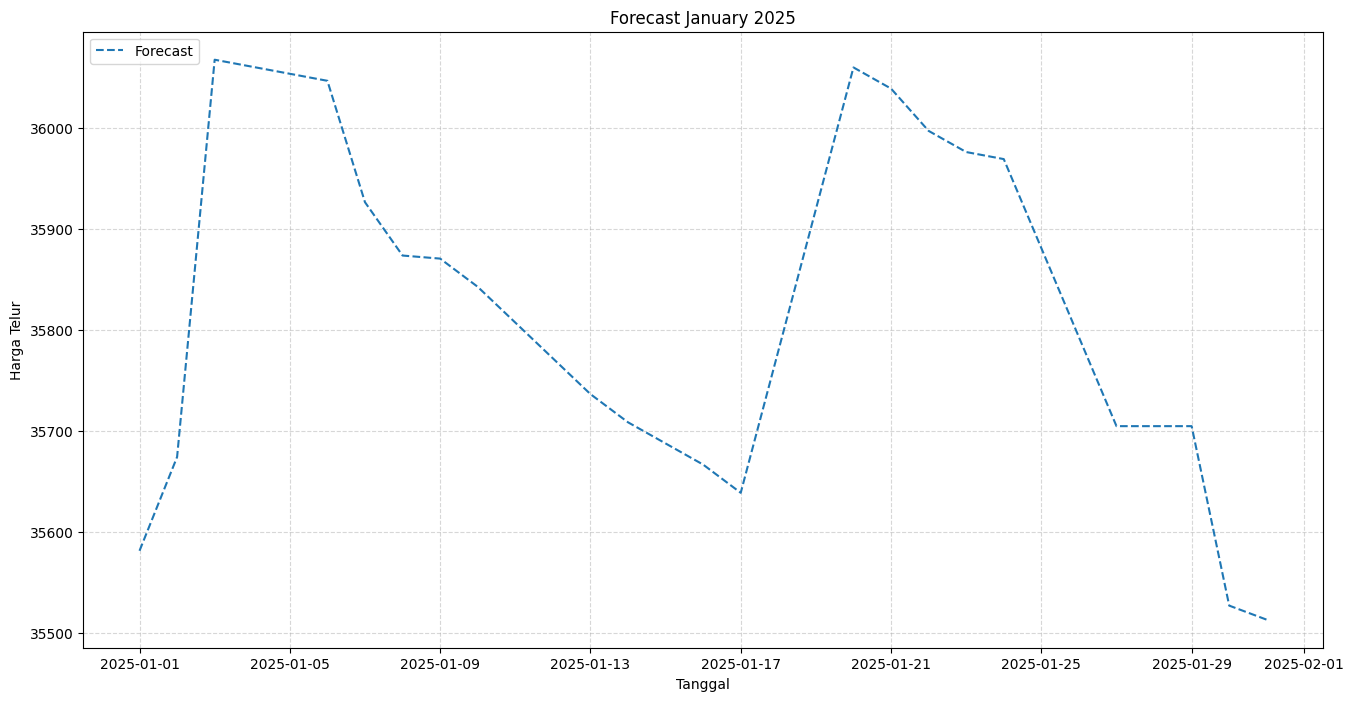

In [ ]:
import matplotlib.pyplot as plt

# Pastikan panjang forecast_result dan y_test sesuai
plt.figure(figsize=(16, 8))

# Plot hasil prediksi (forecast_result)
plt.plot(df1.index, arimax_pred, label='Forecast', linestyle='--')

# Tambahan estetika plot
plt.title("Forecast January 2025")
plt.xlabel("Tanggal")
plt.ylabel("Harga Telur")
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError # Import MeanSquaredError

models = load_model('best_LSTM_Daging103.h5', custom_objects={'mse': MeanSquaredError()})
models.summary()

Model: "sequential_105"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_315 (LSTM)                 │ (None, 5, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_315 (Dropout)           │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_316 (LSTM)                 │ (None, 5, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_316 (Dropout)           │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_317 (LSTM)                 │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_317 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_211 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,931 (503.64 KB)

 Trainable params: 128,929 (503.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
len(X_test)
test_data = X_test
test_data.shape

(10, 5, 1)

In [ ]:
x_input2 = test_data[-1:]
x_input2.shape

(1, 5, 1)

In [ ]:
# List untuk menyimpan prediksi
predicted_values = []

# Iterasi untuk memprediksi
for i in range(23):
    # Buat prediksi berdasarkan urutan saat ini
    prediction = models.predict(x_input2)

    # Ambil nilai prediksi
    predicted_value = prediction[0]

    # Salin urutan saat ini dan geser (drop nilai lama)
    new_sequence = np.copy(x_input2)
    new_sequence[:, :-1] = x_input2[:, 1:]

    # Update harga penutupan
    new_sequence[:, -1] = predicted_value

    # Tambahkan nilai prediksi ke daftar
    predicted_values.append(predicted_value)

    print(f"Iteration {i + 1}:")
    print("Updated sequence (after shifting and adding prediction):")
    print(new_sequence)

    # Perbarui x_input2 dengan urutan baru
    x_input2 = new_sequence

# Konversi daftar prediksi ke numpy array
predicted_values = np.array(predicted_values)

print("Predicted values for the next 30 time steps:", predicted_values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
Iteration 1:
Updated sequence (after shifting and adding prediction):
[[[0.27574102]
  [0.32069593]
  [0.33495076]
  [0.31281469]
  [0.29220384]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Iteration 2:
Updated sequence (after shifting and adding prediction):
[[[0.32069593]
  [0.33495076]
  [0.31281469]
  [0.29220384]
  [0.29705289]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Iteration 3:
Updated sequence (after shifting and adding prediction):
[[[0.33495076]
  [0.31281469]
  [0.29220384]
  [0.29705289]
  [0.30209973]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Iteration 4:
Updated sequence (after shifting and adding prediction):
[[[0.31281469]
  [0.29220384]
  [0.29705289]
  [0.30209973]
  [0.30060205]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Iteration 5:
Updated sequence (after shifting and adding prediction):
[[[0.29220384]
  [0.29705289]
  [0.30209973]
  [0.30060205]
  [0.2961621 ]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Iteration 6:
Updated sequence (after

In [ ]:
prediksi = scaler.inverse_transform(predicted_values.reshape(-1, 1))
prediksi

array([[-209.05226],
       [-156.1474 ],
       [-101.08449],
       [-117.42479],
       [-165.86626],
       [-187.47015],
       [-178.3561 ],
       [-176.81421],
       [-184.8881 ],
       [-192.80074],
       [-195.02675],
       [-194.57088],
       [-195.79639],
       [-197.79251],
       [-199.09247],
       [-199.51614],
       [-199.77171],
       [-200.24059],
       [-200.6763 ],
       [-200.92992],
       [-201.06291],
       [-201.18451],
       [-201.31392]], dtype=float32)

In [ ]:
hybrid_forecasts = arimax_pred + prediksi.flatten()
hybrid_forecasts

,predicted_mean
2024-12-18,35372.373085
2024-12-19,35518.054327
2024-12-20,35966.046826
2024-12-23,35928.858960
2024-12-24,35760.347619
2024-12-25,35685.979673
2024-12-26,35692.066582
2024-12-27,35665.712868
2024-12-30,35551.516895
2024-12-31,35515.708668


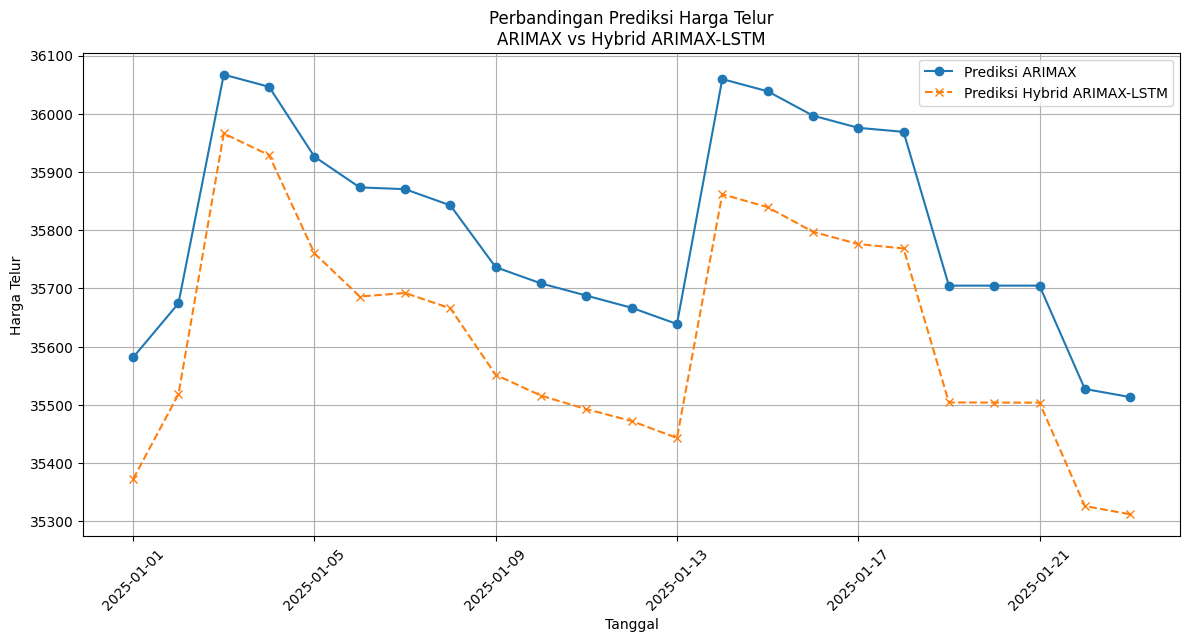

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # jangan lupa ini

# Konversi Series ke array jika belum
arimax_pred = np.array(arimax_pred).flatten()
hybrid_pred = np.array(hybrid_forecasts).flatten()

# Buat sumbu waktu, misalnya 30 hari ke depan
dates = pd.date_range(start='2025-01-01', periods=23, freq='D')

# Buat plot
plt.figure(figsize=(12, 6))
plt.plot(dates, arimax_pred, label='Prediksi ARIMAX', linestyle='-', marker='o')
plt.plot(dates, hybrid_pred, label='Prediksi Hybrid ARIMAX-LSTM', linestyle='--', marker='x')
plt.title('Perbandingan Prediksi Harga Telur\nARIMAX vs Hybrid ARIMAX-LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga Telur')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

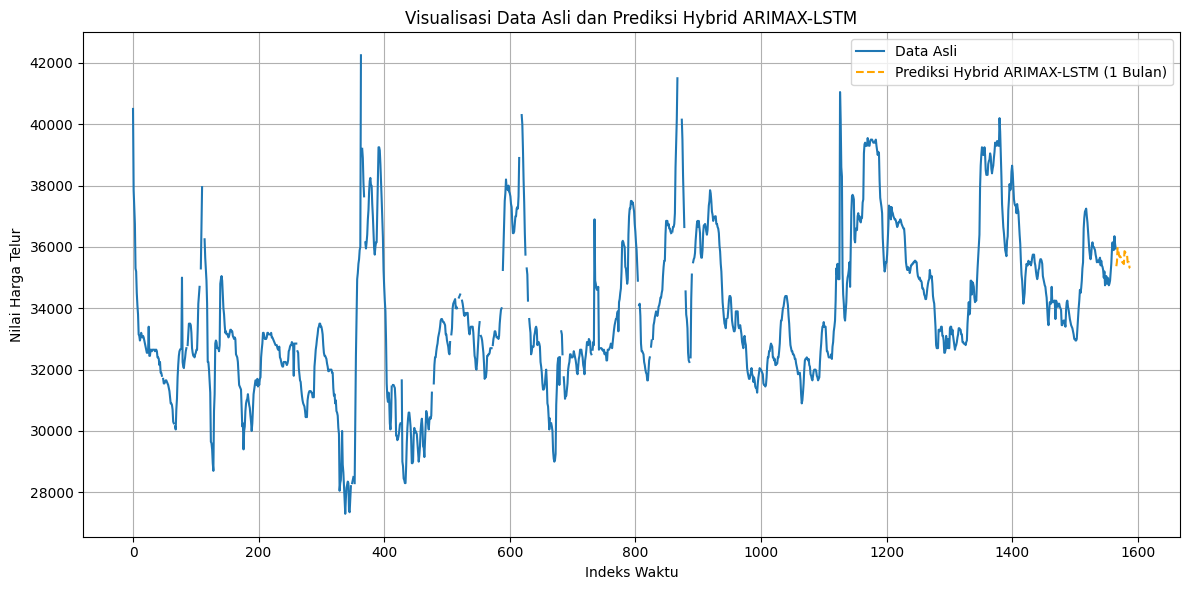

In [ ]:
# Gabungkan data asli dan hasil prediksi
data_asli = df['Harga_Daging_Ayam'].values
data_prediksi = hybrid_pred

# Gabungkan jadi satu array
data_gabungan = np.concatenate([data_asli, data_prediksi])

# Buat label untuk plotting
index_asli = np.arange(len(data_asli))
index_prediksi = np.arange(len(data_asli), len(data_asli) + len(data_prediksi))

# Plot gabungan
plt.figure(figsize=(12, 6))
plt.plot(index_asli, data_asli, label='Data Asli')
plt.plot(index_prediksi, data_prediksi, label='Prediksi Hybrid ARIMAX-LSTM (1 Bulan)', linestyle='--', color='orange')
plt.title('Visualisasi Data Asli dan Prediksi Hybrid ARIMAX-LSTM')
plt.xlabel('Indeks Waktu')
plt.ylabel('Nilai Harga Telur')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()